In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [3]:
ts = pd.read_csv("C:\\Users\\Pranjal mishra\\Downloads\\MLP End term-Classification.csv")

In [4]:
ts.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [5]:
ts.shape

(2043, 9)

In [6]:
ts.size

18387

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [8]:
ts.dtypes

process.b1.capacity      int64
process.b2.capacity      int64
process.b3.capacity      int64
process.b4.capacity      int64
property.price           int64
property.product         int64
property.winner          int64
verification.result       bool
verification.time      float64
dtype: object

In [10]:
ts.tail()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000
2042,2,3,2,1,90,5,4,True,82.008333


Text(0.5, 1.0, 'Correlation Factors Heat Map')

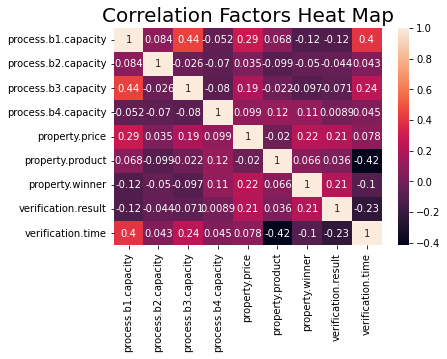

In [14]:
sns.heatmap(ts.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [24]:
ts_final = pd.get_dummies(ts)
ts_final.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [25]:
X = ts_final.drop(columns=['property.price'])
Y = ts_final['property.price']

In [26]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
Y_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 1, 10,  4, ...,  0,  0,  0],
       [ 2,  7,  6, ...,  0,  0,  0],
       [ 6,  3,  0, ...,  0,  0,  0],
       ...,
       [ 0,  1,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, 12]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(Y_test, Y_pred)

0.17455138662316477

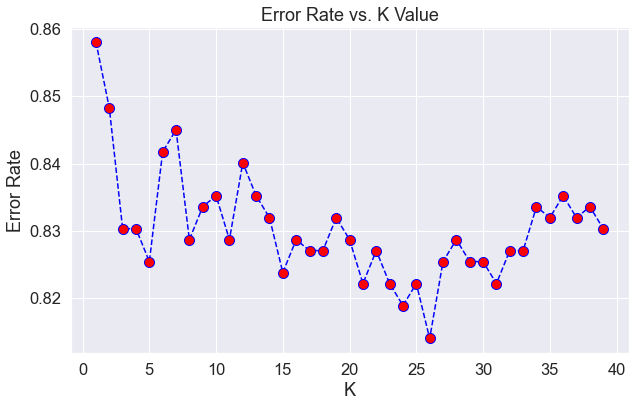

Minimum error :- 0.8140293637846656 at K = 26


In [35]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(1-accuracy_score(Y_test, pred_i))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error :-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [36]:
knn = KNeighborsClassifier(n_neighbors=38, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=38)

In [37]:
Y_pred = knn.predict(X_test)

In [38]:
accuracy_score(Y_test, Y_pred)

0.16639477977161501

In [41]:
ct = dtree(criterion="entropy",
          max_depth=None)
_=ct.fit(X_train, Y_train)

In [42]:
Y_te = ct.predict(X_test)
np.sum((Y_test == Y_te))/Y_test.size

0.3556280587275693

In [43]:
fi = ct.feature_importances_

In [44]:
fi

array([0.058518  , 0.05164216, 0.00565529, 0.03744633, 0.10327948,
       0.08678322, 0.0399493 , 0.61672623])

In [45]:
list(zip(ts.columns, fi))

[('process.b1.capacity', 0.05851799664122291),
 ('process.b2.capacity', 0.05164216343464336),
 ('process.b3.capacity', 0.005655286312763128),
 ('process.b4.capacity', 0.03744633225550076),
 ('property.price', 0.10327947571269426),
 ('property.product', 0.08678322130427607),
 ('property.winner', 0.03994929820191391),
 ('verification.result', 0.6167262261369857)]

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)

In [49]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.25938009787928223


In [51]:
from sklearn import preprocessing
t_nor=preprocessing.normalize(ts)
t_nor=pd.DataFrame(ts)
t_nor
t_nor.columns=ts.columns
t_nor

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


In [57]:
x=t_nor.iloc[:,2:7]
x

,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner
0,2,1,59,1,0
1,2,1,59,2,0
2,2,1,59,4,0
3,2,1,59,6,0
4,2,1,60,1,0
...,...,...,...,...,...
2038,2,1,90,5,0
2039,2,1,90,5,1
2040,2,1,90,5,2
2041,2,1,90,5,3


In [59]:
y=t_nor.iloc[:,7:9]
y

,verification.result,verification.time
0,False,163.316667
1,False,200.860000
2,False,154.888889
3,False,108.640000
4,True,85.466667
...,...,...
2038,True,82.425000
2039,True,1316.983333
2040,False,9365.450000
2041,False,8474.025000


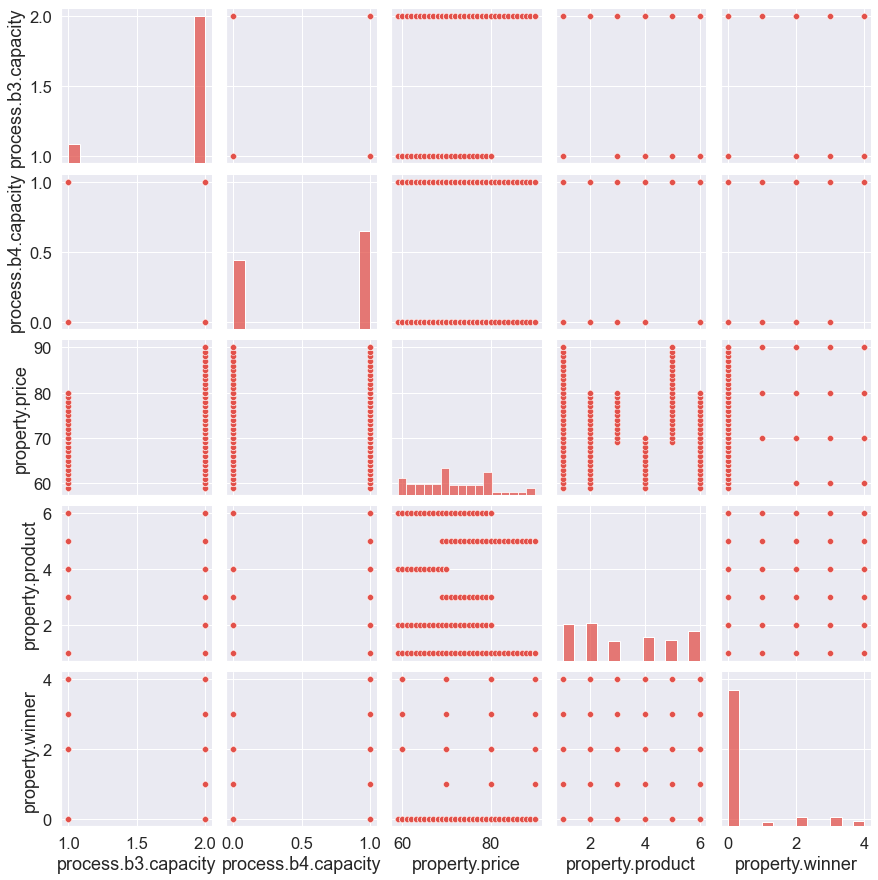

In [60]:
sns.pairplot(x)